# 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

# 데이터 불러오기

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/hana1/Team/final/train_outlier_drop2.csv', index_col = 0)
df_train.head()
print(df_train.shape)

(50503, 23)


In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/hana1/Team/final/test_outlier_drop2.csv', index_col = 0)
df_test.head()
print(df_test.shape)

(24683, 22)


# 데이터 분할

In [5]:
# X, y 분할
X_train = df_train.drop('Credit_Score', axis = 1)
y_train = df_train['Credit_Score']
X_test = df_test

print("X_train 데이터: ", X_train.shape)
print("y_train 데이터: ", y_train.shape)
print("X_test 데이터: ", X_test.shape)

X_train 데이터:  (50503, 22)
y_train 데이터:  (50503,)
X_test 데이터:  (24683, 22)


## 훈련 / 검증

In [6]:
# 훈련 / 검증 데이터 분할 = 8:2
from sklearn.model_selection import train_test_split

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train,
                                                          test_size = 0.2,
                                                          random_state = 42,
                                                          stratify = y_train)

print("X_train 데이터: ", X_train_sub.shape)
print("X_val 데이터: ", X_val.shape)
print("y_train 데이터: ", y_train_sub.shape)
print("y_val 데이터: ", y_val.shape)

X_train 데이터:  (40402, 22)
X_val 데이터:  (10101, 22)
y_train 데이터:  (40402,)
y_val 데이터:  (10101,)


## 훈련(SMOTE) / 검증

In [7]:
# # Handle Imbalance Data
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# X_train_sm, y_train_sm = smote.fit_resample(X_train_sub, y_train_sub)

# print("X_train_sm 데이터: ", X_train_sm.shape)
# print("X_val 데이터: ", X_val.shape)
# print("y_train_sm 데이터: ", y_train_sm.shape)
# print("y_val 데이터: ", y_val.shape)

# print()
# print("y_train_sm 데이터 분포: ")
# print(y_train_sm.value_counts())

# Model 1 생성 및 훈련

## 경우 1) Extra Tree (훈련)

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 5)

print("5-fold : ", scores['test_score'])
print(np.mean(scores['test_score']))

5-fold :  [0.71210771 0.71270171 0.71042471 0.69891089 0.71346535]
0.7095220745715795


In [9]:
et.fit(X_train_sub, y_train_sub)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [10]:
# predict
y_train_sub_pred = et.predict(X_train_sub)
y_val_pred = et.predict(X_val)
print('train 데이터 예측값 실제값 비교')
print(y_train_sub_pred[:5])
print(y_train_sub.values[:5])
print()
print('validation 데이터 예측값 실제값 비교')
print(y_val_pred[:5])
print(y_val.values[:5])
print()

# 정확도
print("train 데이터 정확도: ", et.score(X_train_sub, y_train_sub))
print("validation 데이터 정확도: ", et.score(X_val, y_val))

train 데이터 예측값 실제값 비교
[2 2 0 2 2]
[2 2 0 2 2]

validation 데이터 예측값 실제값 비교
[2 2 2 1 1]
[2 2 2 1 1]

train 데이터 정확도:  1.0
validation 데이터 정확도:  0.8154638154638154


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_train_sub, y_train_sub_pred))
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7445
           1       1.00      1.00      1.00     10597
           2       1.00      1.00      1.00     22360

    accuracy                           1.00     40402
   macro avg       1.00      1.00      1.00     40402
weighted avg       1.00      1.00      1.00     40402

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1861
           1       0.81      0.80      0.80      2650
           2       0.83      0.84      0.84      5590

    accuracy                           0.82     10101
   macro avg       0.80      0.80      0.80     10101
weighted avg       0.82      0.82      0.82     10101



## 경우 2) Extra Tree (훈련 SMOTE)

In [12]:
# et.fit(X_train_sm, y_train_sm)

In [13]:
# # predict
# y_train_sm_pred = et.predict(X_train_sm)
# y_val_pred = et.predict(X_val)
# print('train 데이터 예측값 실제값 비교')
# print(y_train_sm_pred[:5])
# print(y_train_sm.values[:5])
# print()
# print('validation 데이터 예측값 실제값 비교')
# print(y_val_pred[:5])
# print(y_val.values[:5])
# print()

# # 정확도
# print("train 데이터 정확도: ", et.score(X_train_sm, y_train_sm))
# print("validation 데이터 정확도: ", et.score(X_val, y_val))

In [14]:
# from sklearn.metrics import classification_report
# print(classification_report(y_train_sm, y_train_sm_pred))
# print(classification_report(y_val, y_val_pred))

## 예측

In [15]:
y_pred = et.predict(X_test)
y_pred

array([0, 2, 2, ..., 2, 2, 1])

In [16]:
df_test['Credit_Score'] = y_pred
df_test

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,9,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,35.030402,273.0,0,49.574949,236.642682,5,186.266702,0
1,10,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,33.053114,274.0,0,49.574949,21.465380,1,361.444004,2
2,11,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,1,809.98,33.811894,274.0,0,49.574949,148.233938,4,264.675446,2
3,12,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,4.0,...,1,809.98,32.430559,276.0,0,49.574949,39.082511,1,343.826873,2
4,9,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,25.926822,327.0,0,18.816215,39.684018,0,485.298434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,9,29.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,0,3571.70,32.391288,76.0,1,60.964772,107.210742,5,314.815153,2
49993,10,29.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,0,3571.70,37.528511,77.0,1,60.964772,71.794421,5,350.231473,2
49994,11,29.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,0,3571.70,27.027812,78.0,1,60.964772,50.846847,2,341.179047,2
49997,10,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,1,502.38,36.858542,384.0,0,35.104023,10000.000000,3,349.726332,2


In [17]:
df_test['Credit_Score'].value_counts()

2    14007
1     6393
0     4283
Name: Credit_Score, dtype: int64

Text(0.5, 1.0, 'Top feature importance')

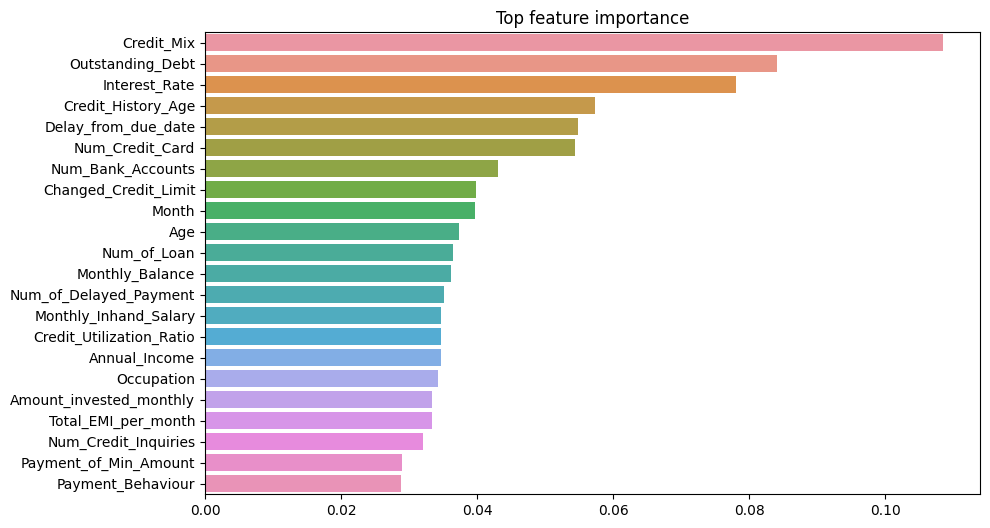

In [18]:
f_imp_v = et.feature_importances_
f_imp_v = pd.Series(f_imp_v, index = X_train.columns)
f_imp_v.sort_values(ascending=False)

f_top = f_imp_v.sort_values(ascending=False)
plt.figure(figsize = (10, 6))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')

# Standard 데이터만 저장 (Train, Test)

In [19]:
df_train_standard = df_train[df_train['Credit_Score']==2]
df_train_standard.shape

(27950, 23)

In [20]:
df_test_standard = df_test[df_test['Credit_Score']==2]
df_test_standard.shape

(14007, 23)

In [21]:
df_train_standard.to_csv('/content/drive/MyDrive/hana1/Team/final/drop_standard_train.csv')
df_test_standard.to_csv('/content/drive/MyDrive/hana1/Team/final/drop_standard_test.csv')